# <center>🧠 **Logistic Regression Mutli-Class Classification (Linear)**</center>

## 🎯 **What Problem Does It Solve?**

#### Used when the **target variable has more than 2 classes**:

Examples:

- Iris flower species: `Setosa`, `Versicolor`, `Virginica` (3 classes)

- Digit recognition: digits `0–9` (10 classes)

- Fruit classification: `Apple`, `Banana`, `Mango` (3 classes)

## ✅ **Approaches to Multiclass Logistic Regression**

There are **Two** main strategies:

| Strategy                                                 | Description                                                                     | Library Support                                                  | Pros          | Cons                                |
| -------------------------------------------------------- | ------------------------------------------------------------------------------- | ---------------------------------------------------------------- | ------------- | ----------------------------------- |
| **One-vs-Rest (OvR)**                                    | Train 1 classifier per class → treat that class as positive and others negative | Default in Scikit-learn                                          | Simple, fast  | Not optimal for overlapping classes |
| **Softmax Regression / Multinomial Logistic Regression** | One model learns all classes together using **softmax**                         | `multi_class='multinomial'` with `solver='lbfgs'` or `newton-cg` | More accurate | More computation                    |



## **✅ Softmax Activation (very important!)**


The hypothesis output for class \( k \):

$$
P(y = k \mid x) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$$

Where:

- $ z_k = \theta_k^T $ is the logit for class k.
- Output: **Probabilities for all K classes that sum to 1**

Example : Model Predicts:

| Class      | Probability |
| ---------- | ----------- |
| Setosa     | 0.92        |
| Versicolor | 0.07        |
| Virginica  | 0.01        |




## ✅ **Loss Function: Categorical Cross-Entropy**

$$
J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}
y_{i,k} \log \big(h_\theta(x_i)_k\big)
$$

Where:

$y_{i,k}$ = 1 only when sample 𝑖 belongs to class 𝑘


This loss penalizes confident wrong predictions heavily.

## ✅ **Decision Boundary**

Model is still linear, but now multiple boundaries divide the feature space among classes.

In [563]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [564]:
dataset = pd.read_csv("Iris.csv")

In [565]:
dataset.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [566]:
df = dataset.iloc[:,1:]

In [567]:
# Looking for the unique categories
df["Species"].unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

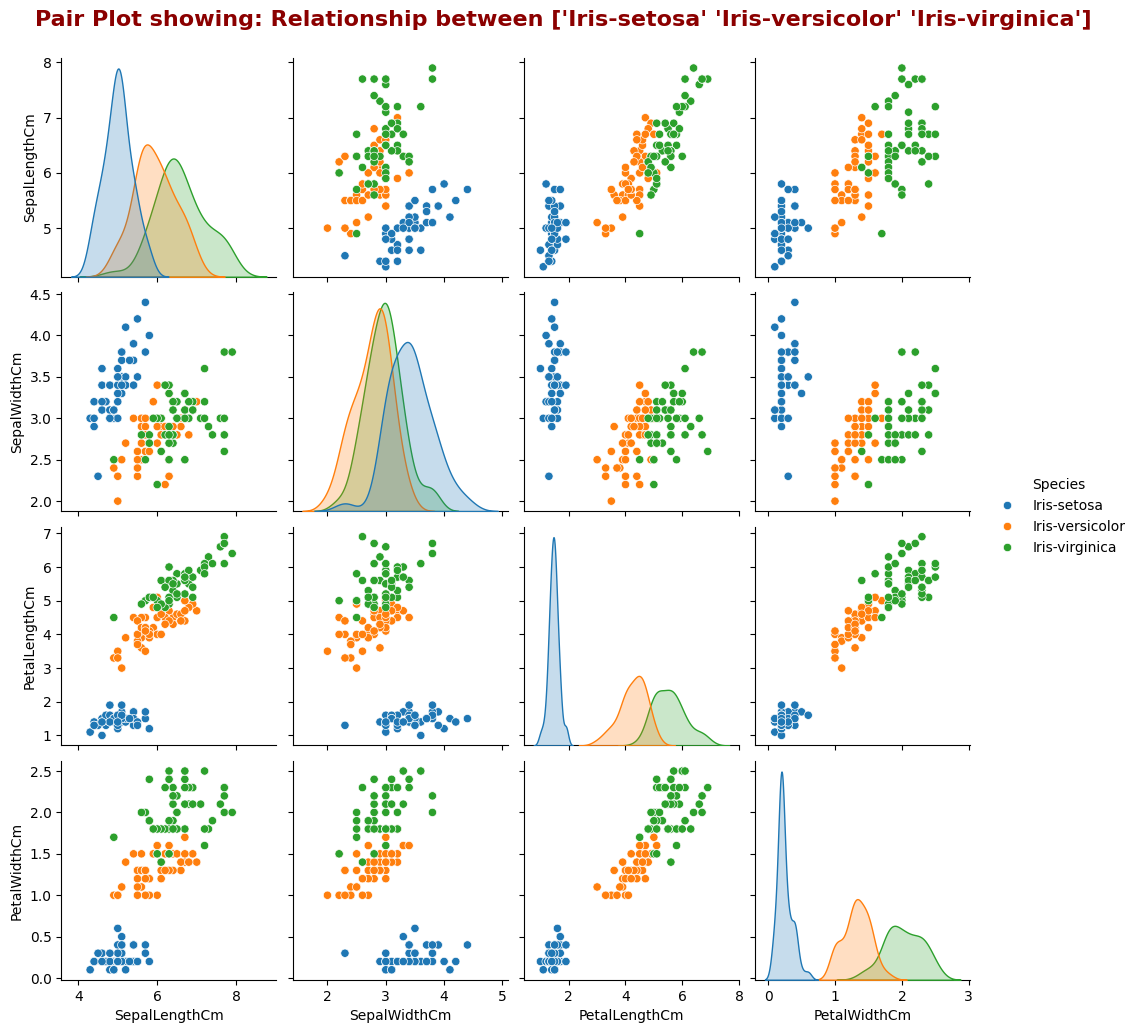

In [568]:
sns.pairplot(data = df, hue = "Species",aspect = 1).figure.suptitle(
    f"Pair Plot showing: Relationship between {df["Species"].unique()}",
    y=1.02, # Adjust the vertical position (1.0 is default, 1.02 moves it slightly up)
               x=0.5,  # Adjust the horizontal position (0.5 is centered)
               ha='center', # Horizontal alignment
               va='center', # Vertical alignment
               fontsize=16, # Increase font size
               fontweight='bold', # Make it bold
               color='darkred' # Change the color
)
# plt.title(f"Pair Plot showing: Relationship between {df["Species"].unique()}", y = 4.35, fontweight = 'bold',fontsize = 16)
plt.show()

## **Interpretation of the above plot**

#### ➡️ **Diagonal Analysis Feature Distribution**
The diagonal plots show **KDE distributions** (density curves)

| Feature       | Key Observations                           | Interpretation          |
| ------------- | ------------------------------------------ | ----------------------- |
| SepalLengthCm | Large overlap among species                | Weak predictor          |
| SepalWidthCm  | Strong overlap                             | Weak predictor          |
| PetalLengthCm | Setosa entirely separated                  | Strong predictor ✅      |
| PetalWidthCm  | Setosa separated, little overlap in others | Very strong predictor ✅ |

Petal-length and petal-width provide excellent class separation, while sepal features do not.


#### ➡️ Off-Diagonal Scatterplots — Feature Relationships
Plots like:

PetalLengthCm vs PetalWidthCm

SepalLengthCm vs PetalLengthCm

show: 
| Species                | Pattern                       | Classification ease |
| ---------------------- | ----------------------------- | ------------------- |
| Setosa                 | Completely separated cluster  | ⭐ Very easy         |
| Versicolor & Virginica | Slightly overlapping clusters | Medium difficulty   |

Strong positive correlation exists in petal measurements → helps linear classifier.

#### ❌ Sepal Features: Weak Predictors

Plots involving:

- SepalLengthCm vs SepalWidthCm

show:

- Heavy overlap of species

- No clear clustering

→ These features alone are unreliable for classification.

#### ✅ Final Analytical Conclusion

| Species    | Separability | Comment                           |
| ---------- | ------------ | --------------------------------- |
| Setosa     | Excellent ✅  | Can be classified easily          |
| Versicolor | Moderate     | Needs multi-feature decision      |
| Virginica  | Moderate     | Slight similarity with Versicolor |


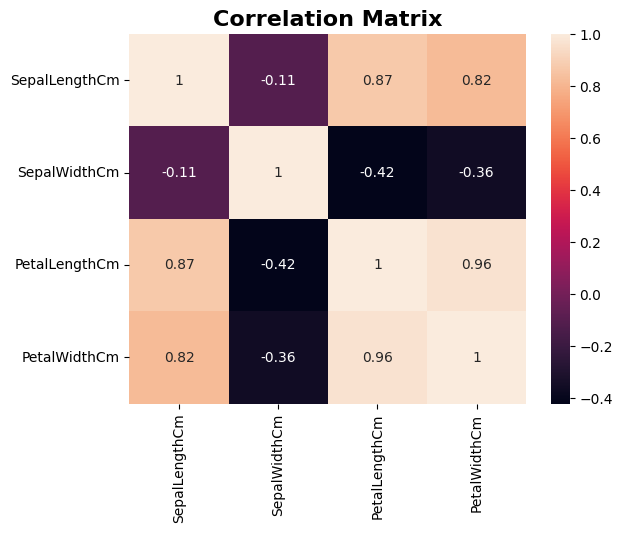

In [569]:
sns.heatmap(data = df.iloc[:,:-1].corr(),annot = True)
plt.title("Correlation Matrix", fontweight = "bold", fontsize = 16)
plt.show()

In [570]:
x = df.iloc[:,:-1]
x.ndim

2

In [571]:
y = df.iloc[:,-1]
y.ndim

1

# 🧠 Manual Encoding of Species

#### **using `np.where()`**

In [572]:
import numpy as np

categories = y.unique()
categories

y  = np.where(y == categories[0],0, np.where(y == categories[1], 1, 2))

### Explanation of the above code 👍
```python
np.where(cond1,
         A,
         np.where(cond2,
                  B,
                  C))
```

##### if observation is setosa replace with 0, else if observation is versicolor replace with 1 Else (only case virginica) replace with 2

# ➡️ Now train test Split

In [573]:
from sklearn.model_selection import train_test_split

In [574]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

# 🆚 **OVR : Using One VS Rest Method**

In [575]:
from sklearn.linear_model import LogisticRegression

In [576]:
lor = LogisticRegression(multi_class = "ovr")

In [577]:
lor.fit(x_train,y_train)

/home/akash/myEnv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [578]:
lor.score(x_test, y_test)*100

96.66666666666667

In [579]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

In [580]:
y_pred = lor.predict(x_test)

acc_score = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test,y_pred)

print(f"accuracy_score : {acc_score}\nconfusion_matrix :\n{conf_matrix}\nClassification Report:\n{class_report}")

accuracy_score : 0.9666666666666667
confusion_matrix :
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



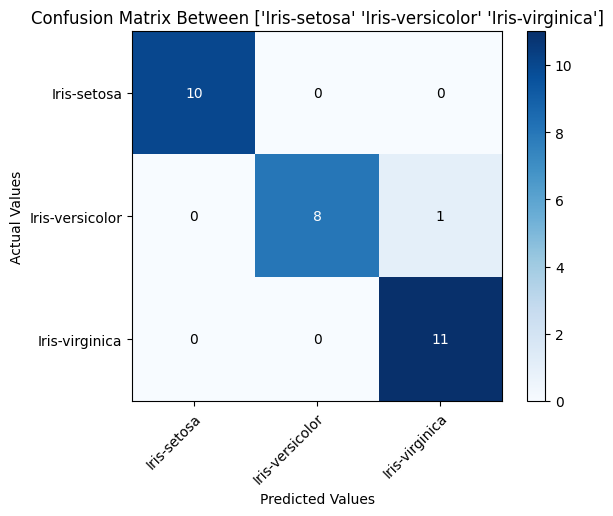

In [581]:
plot_confusion_matrix(conf_matrix, class_names=df["Species"].unique(), colorbar = True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title(f"Confusion Matrix Between {df["Species"].unique()}")
plt.show()


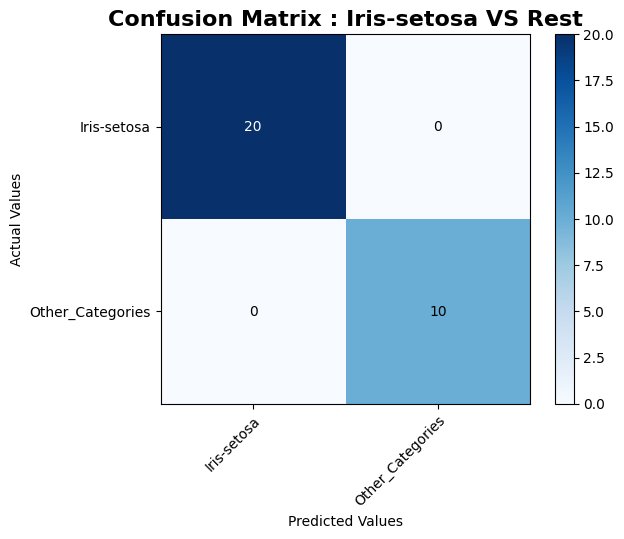

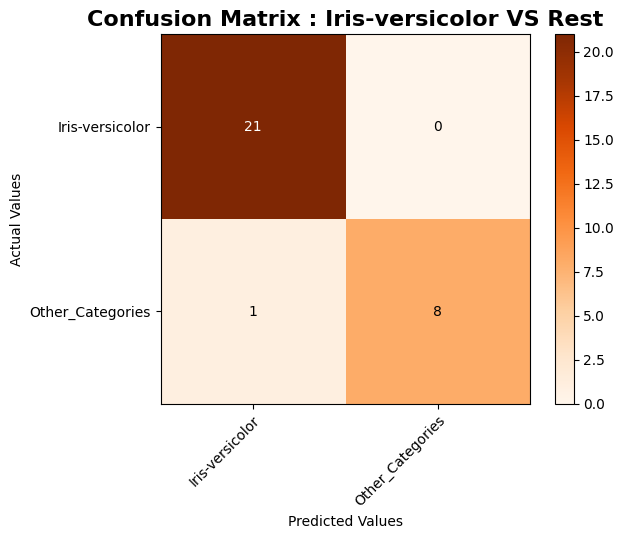

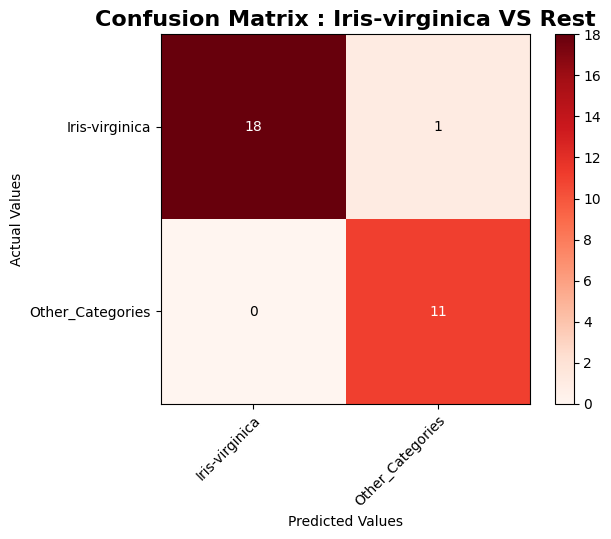

In [582]:
from sklearn.metrics import multilabel_confusion_matrix

m_conf_matrix = multilabel_confusion_matrix(y_test, y_pred)

m_conf_matrix

for i in range(len(m_conf_matrix)):
   plot_confusion_matrix(
      m_conf_matrix[i], 
      colorbar=True , 
      cmap = ["Blues","Oranges","Reds"][i],
      class_names = [df["Species"].unique()[i], "Other_Categories"] )
   plt.xlabel("Predicted Values")
   plt.ylabel("Actual Values")
   plt.title(f"Confusion Matrix : {df["Species"].unique()[i]} VS Rest", fontweight = "bold", fontsize = 16)
   plt.show()

# 💪 **Multinomial : Using softmax function which is a underlying functionality of multinomial**

In [583]:
# multinomial

lor1 = LogisticRegression(multi_class = "multinomial", solver='lbfgs', max_iter = 1000, C = 0.1, penalty= 'l2')

### 🧠 Explaination of the above code:

| Code Line                   | Meaning                                            |
| --------------------------- | -------------------------------------------------- |
| `multi_class='multinomial'` | Enable **Softmax-based Logistic Regression**       |
| `solver='lbfgs'`            | Optimization algorithm that supports multinomial   |
| `max_iter=1000`             | Avoid convergence issues 🛠️                       |



### ✅ Why we use `max_iter` parameter

> ##### During training, the optimizer tries to **minimize the loss**. This happens through **iterations**.

> ##### ✅ If the algorithm successfully reaches the minimum loss → We say **it has converged**.

> ##### ❌ If it stops early or gets stuck before reaching the minimum → We say **it failed to converge** why does it happens? it happens because by default max_iter = 100. so sometimes data is too large that these iterations gets completed without minimizing the loss to the least value 

> #### ⏯️ Other Reason is that LBFGS can have convergence issues
**Why? ---> Becasue:**

| Cause                                         | Why it affects LBFGS                        |
| --------------------------------------------- | ------------------------------------------- |
| **Features are not scaled**                   | Gradient jumps may overshoot → unstable     |
| **Too few iterations (default max_iter=100)** | It stops early before reaching minimum      |
| **Large number of classes or features**       | Curvature matrix approx becomes complex     |
| **Non-smooth loss (e.g., L1 penalty)**        | LBFGS requires smooth optimization function |



### ✅ What is LBFGS?

> 🧠 LBFGS = Limited-memory Broyden–Fletcher–Goldfarb–Shanno

> It is an advanced optimization algorithm used to minimize a loss function.LBFGS is an optimization solver used in machine learning that efficiently approximates the curvature of the loss function using limited memory. It is ideal for multinomial logistic regression and small to medium-sized datasets.

- 📌 It belongs to the Quasi-Newton family of methods
- 👉 Tries to approximate the Hessian matrix (curvature of loss function)
- 👉 But uses only limited memory, making it efficient

In [584]:
lor1.fit(x_train, y_train)

/home/akash/myEnv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial')

In [585]:
lor1.score(x_test,y_test)*100

100.0

### 🔷 Probability Prediction

In [586]:
probs = lor1.predict_proba(x_test)
print(probs[:5])


[[4.21870156e-02 6.03018857e-01 3.54794127e-01]
 [8.58811242e-01 1.38118672e-01 3.07008631e-03]
 [1.50668317e-04 7.40342889e-02 9.25815043e-01]
 [5.23005967e-02 5.82972986e-01 3.64726418e-01]
 [2.46347032e-02 5.34650623e-01 4.40714674e-01]]


#### Note for above 👉 Each row sums to 1 → Softmax ✅

## 📊 **Now Accuracy and Confusion Matrix of Multionomial**

In [587]:
y_pred = lor1.predict(x_test)

In [588]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc_score = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"accuracy_score : {acc_score}\nconfusion_matrix :\n{conf_matrix}")

accuracy_score : 1.0
confusion_matrix :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


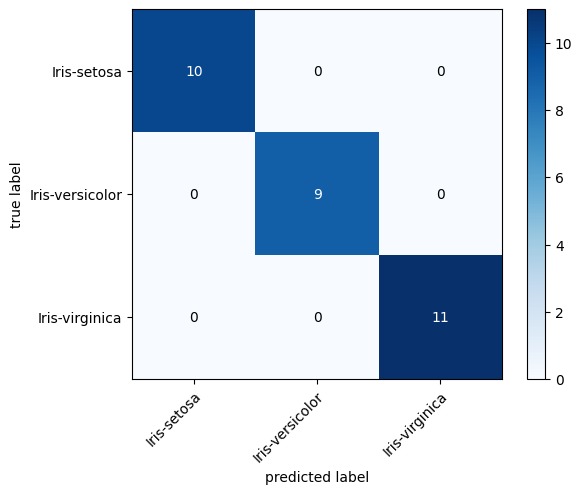

In [589]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(conf_matrix, colorbar = True, class_names=df["Species"].unique())

plt.show()



In [590]:
from sklearn.metrics import multilabel_confusion_matrix

m_conf_matrix = multilabel_confusion_matrix(y_test, y_pred)

m_conf_matrix

array([[[20,  0],
        [ 0, 10]],

       [[21,  0],
        [ 0,  9]],

       [[19,  0],
        [ 0, 11]]])

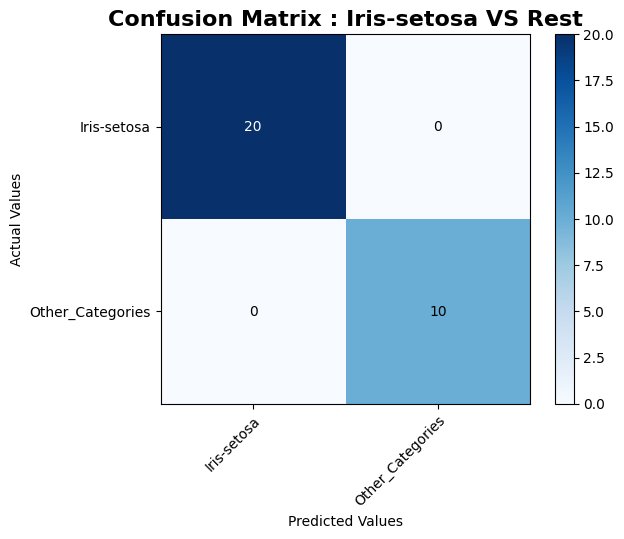

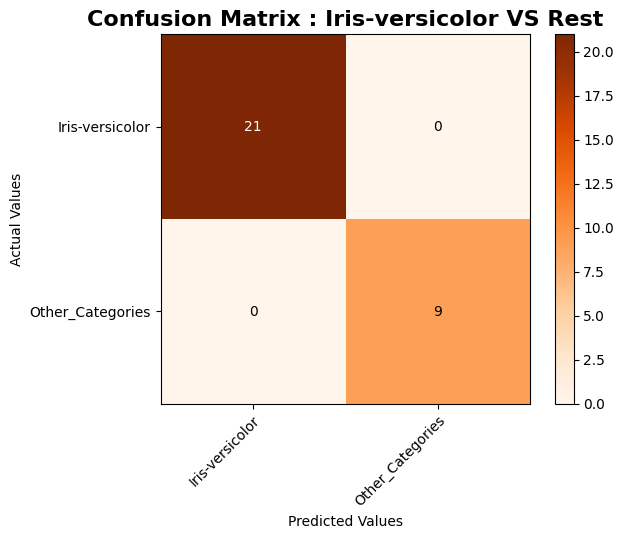

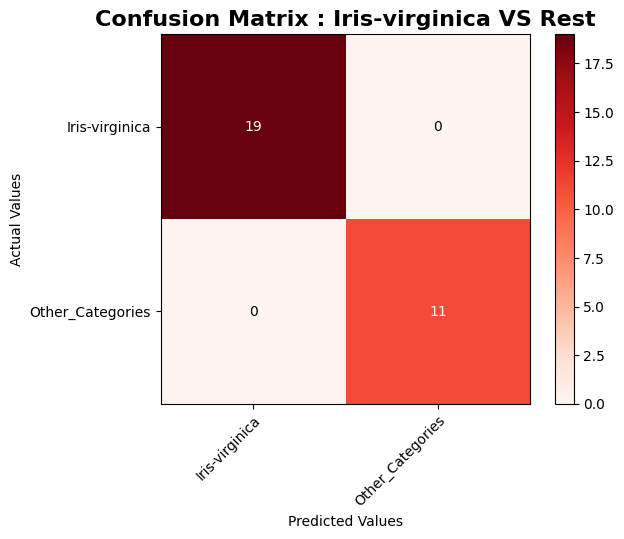

In [591]:
for i in range(len(m_conf_matrix)):
   plot_confusion_matrix(
      m_conf_matrix[i], 
      colorbar=True , 
      cmap = ["Blues","Oranges","Reds"][i],
      class_names = [df["Species"].unique()[i], "Other_Categories"] )
   plt.xlabel("Predicted Values")
   plt.ylabel("Actual Values")
   plt.title(f"Confusion Matrix : {df["Species"].unique()[i]} VS Rest", fontweight = "bold", fontsize = 16)
   plt.show()

# **🔶 Decision Boundary of the Plot**

#### ➡️ **Only taking the most important petal features to train the model because we can only plot 2D and 3D feature space (with plot_decision_region we can plot only 2D feature space) and on those feature space we have to show the Decision Boundary of the predictions**


In [592]:
from mlxtend.plotting import plot_decision_regions

In [603]:
x1 = x.iloc[:,2:4]
x1
# x1.max()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [594]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [595]:
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size = 0.2, random_state = 42)

In [596]:
lor2 = LogisticRegression(multi_class="multinomial", solver='lbfgs',max_iter=1000, C = 0.1, penalty = 'l2')

In [597]:
lor2.fit(x_train, y_train)

/home/akash/myEnv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial')

/home/akash/myEnv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


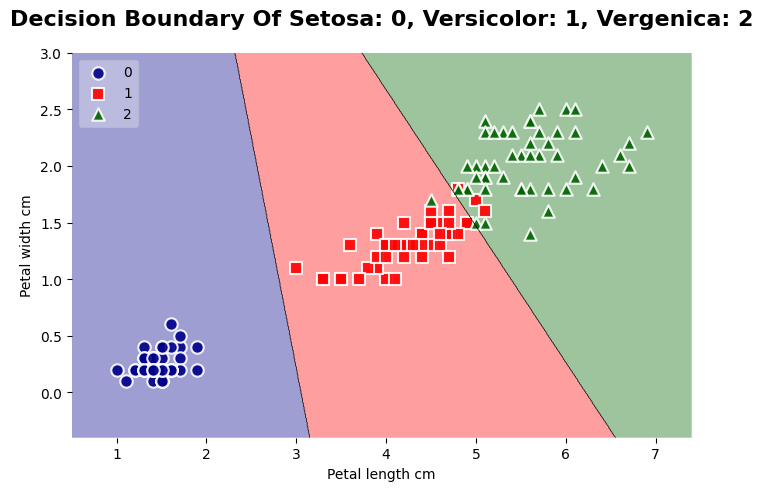

In [604]:
plt.figure(figsize =(8,5))

plot_decision_regions(
    x1.to_numpy(),
    y,
    clf = lor2,
    zoom_factor = 2,
    markers = "os^",
    legend = 2,
    colors = "darkblue,red,darkgreen",
    scatter_kwargs= {'s' : 80, 'alpha': 0.9, 'edgecolor' : 'white', 'linewidth' : 1.5 },
    contourf_kwargs = {'alpha' : 0.38}
    )

plt.title("Decision Boundary Of Setosa: 0, Versicolor: 1, Vergenica: 2",fontweight = 'bold',fontsize = 16, y = 1.05)
plt.xlabel("Petal length cm")
plt.ylabel("Petal width cm")
plt.show()

In [600]:
lor2.score(x1, y)

0.9733333333333334

# 🛺 **`auto` (default)**
> ### **automatically detects** the data whether it belongs to **binary class or  mutlticlass** and if it belongs to multiclass it automatically chooses to `ovr` and `multinomial` just like here it has chose `multinomial` over `ovr`

In [ ]:
# auto (default) automatically detects the data whether it belongs to binary class or  mutlticlass 

lor3 = LogisticRegression()

lor3.fit(x_train, y_train)

lor3.score(x_test,y_test)

1.0

# 🫴 **When to Use Which Strategy ?**

| Dataset Size                | Recommended Strategy  |
| --------------------------- | --------------------- |
| Small dataset               | OvR                   |
| Large dataset               | Softmax (multinomial) |
| Ultimate performance needed | Softmax               |
| Simplicity                  | OvR                   |

#### Scikit-learn defaults:

- binary → sigmoid

- multiclass → OvR unless forced to multinomial


# 🧠 Regression, Multicollinearity & Coefficients In Case of Classification — EXTRA

---

## 🌸 1️⃣ Best Predictors vs. The Core Problem

### ✅ Best Predictors in Iris Dataset
Petal features are the strongest indicators of species:
- **Petal Length**
- **Petal Width**

They clearly separate Setosa, Versicolor & Virginica.

### ⚠️ The Core Issue: Multicollinearity  
These two best features are **highly correlated**:

$$\rho \approx 0.96$$

📌 Meaning:  
If the Petal Length is known, Petal Width can be guessed almost perfectly → **redundant information**.

This redundancy creates several downstream issues.

---

## 🎯 2️⃣ Two Opposite Effects of Multicollinearity

| Effect | What Happens? | Good or Bad? |
|-------|----------------|--------------|
| Overall Prediction | Model still predicts perfectly | ✅ Good |
| Individual Coefficients | Become unstable and unreliable | ❌ Bad |

## 💡 Why doesn't Multicollinearity affects the Accuracy of the model ? **IMPORTANT**
> ##### 🌟 The *combined* signal is strong → ✅ predictions stay great **even if you remove one these columns before training it won't affect the accuracy of the model at all because Multicollinearity is considered "not much of a big issue" in Logistic Regression only when your single, primary goal is prediction (classification accuracy).**
> ##### 🌟 Even though the individual coefficients (Solution A vs. Solution B) are unstable, all those solutions lead to the same final decision boundary for separating the classes. The model's overall mathematical output for a given flower will be the same, leading to the same correct prediction.
> ##### 🌟 **It is still a massive issue if your goal is inference (understanding the why).** If your goal is to understand the unique effect of each feature


---

## 🎢 3️⃣ How Variance of Coefficients Gets “Inflated”

Goal of the model:
> Find weights that form the best *Petal Score*, say **10**

But since features are redundant, it has **infinite possible solutions**:

- A:   $9 \cdot L + 1 \cdot W = 10$
- B:   $1 \cdot L + 9 \cdot W = 10$
- C:   $5 \cdot L + 5 \cdot W = 10$

📌 With a tiny data change (remove just *one flower*!),  
model may suddenly jump from solution A → B 🚀

> ### 🌟🌟🌟 This wide spread in possible weight values = **Inflated Variance**  (spread of data is variance since spread of the weight values got increased thats why we say that the variance of coefficients got inflated)
> ### → Coefficients become **unstable and untrustworthy** for interpretation

---

## 🧱 4️⃣ Training Instability ≠ Final Model Instability

| Stage | Behavior |
|-------|----------|
| During Training | Coefficients swing wildly ⚖️ |
| After Fit | Final weights are fixed and stable 🔒 |

✅ Model will always produce consistent predictions  
❌ But the coefficients may not reflect **true feature importance**

---

## 🔐 5️⃣ Log-Odds: The Language of Logistic Regression

Problem: Linear models output  
$-\infty \rightarrow +\infty$  
But probabilities must stay  
$0 \rightarrow 1$

So logistic regression predicts:

- **Probability** → between 0 and 1
- Convert to **Odds**:
  $\text{Odds} = \frac{P}{1-P}$
- Convert to **Log-Odds**:
  $\log\left(\frac{P}{1-P}\right)$

🧩 Log-Odds give a **perfect mathematical range** for linear equations ✅

---

## 🌡️ 6️⃣ VIF — Measuring Multicollinearity

Variance Inflation Factor checks how much **variance** is inflated:

- **VIF = 1** → Perfect 😎
- **VIF > 5** → Warning 🚧
- **VIF > 10** → Serious trouble 🔥🔥

### Formula
$\text{VIF} = \frac{1}{1 - R^2}$

> The \(R^2\) here is from a **separate regression**  
> Example: Predict Petal Length using other features

If this \(R^2 = 0.96\), then:

$\text{VIF} = \frac{1}{1-0.96} = 25$  
👉 Variance is **25× larger than normal**

---

## ✅ Final Takeaways

| Concept | Meaning | Why it Matters |
|--------|---------|----------------|
| Multicollinearity | Features highly redundant | Hard to interpret model |
| Predictions | Remain accurate | Model has strong signal |
| Coefficients | Become unstable | Hard to trust "importance" values |
| VIF | Thermometer for collinearity | Detect and fix the issue |

---

📌 **Moral**:  
> A model can predict very well while still hiding serious instability inside its coefficients.

✨ Always check VIF before interpreting weights!
